$\textbf{Empirical Exercise-Week 2}$  Page 141, Problem 3.26
Lets look at the example from your book, related wages to experience in the world force.

In [5]:
Tab1 = readtable('cps5_small.csv');
size(Tab1);
Tab1(1,:)


ans =

  1x10 table

    black    educ    exper    faminc    female    metro    midwest    south    wage     west
    _____    ____    _____    ______    ______    _____    _______    _____    _____    ____

      0       13      45        0         1         1         0         0      44.44     1  




In [6]:
wage = Tab1(:,9); exper = Tab1(:,3); metro = Tab1(:,6);
educ = Tab1(:,2);
wage1 = table2array(wage); exper1 = table2array(exper);
educ1 = table2array(educ);
metro1 = table2array(metro);



In [7]:
yy = wage1; xx = [ones(1200,1) exper1];   % create regression variabels;
[B,BINT,R,RINT,STATS] = regress(yy,xx);   

In [8]:
[B BINT]


ans =

   21.6231   19.8811   23.3651
    0.0863    0.0215    0.1511




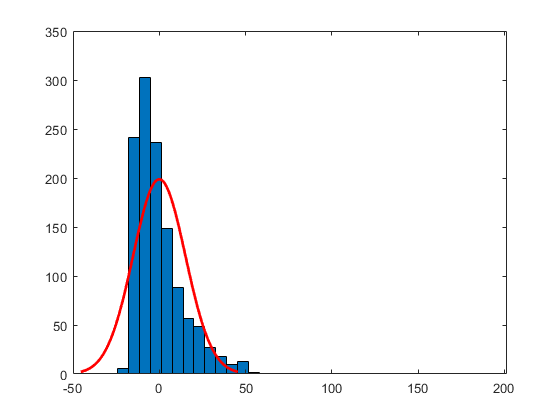

In [9]:
histfit(R)

In [11]:
[h, pval] = jbtest(R); warning off;
[h, pval]



ans =

    1.0000    0.0010




T stat for the coefficient is 2.61. We have 1200 observations and 2 regressors, so we have 1198 degress of freedom. We are asked to do a one-tailed test of significance.

In [34]:
help tcdf  %  Evaluate the p-value for the reported t-stat, 2.61, at 1198 degrees of freedom

 TCDF   Student's T cumulative distribution function (cdf).
    P = TCDF(X,V) computes the cdf for Student's T distribution
    with V degrees of freedom, at the values in X.
 
    The size of P is the common size of X and V. A scalar input
    functions as a constant matrix of the same size as the other input.
 
    P = TCDF(X,V,'upper') computes the upper tail probability of the
    Student's T distribution with V degrees of freedom, at the values in X.
 
    See also TINV, TPDF, TRND, TSTAT, CDF.

    Documentation for tcdf
       doc tcdf

    Other functions named tcdf

       gpuArray/tcdf




So at a one-tailed 5 percent test, we can reject the null hypothesis that the coefficeint of experience is zero. Next question: extract the data for metro1==1, do a regression for the folks living in a metro area. It is easy, see below.  We put the dummy for the metro1 in the first column, then create an indicator WhichRow for Metro1 == 1, then extract the rows and columns 2 to end from the Data matrix. 

In [12]:
Data = [metro1 yy xx(:,1:2)];  % Combine data set with metro1 and the y and x variables
WhichRow = Data(:,1)==1;   % Find indicator for metro1 = 1;
Data1 = Data(WhichRow,2:end);   % Extrat the data for metro1 == 1;
yyy = Data1(:,1); xxx = Data1(:,2:end);
[B1,BINT1,R1,RINT1,STATS1] = regress(yyy,xxx);



In [15]:
[B1,BINT1]


ans =

   21.8886   19.8882   23.8891
    0.1128    0.0374    0.1882




In [16]:
who


Your variables are:

B         BINT      Data      R         RINT      STATS     Tab1      ans       educ1     exper1    metro     pval      wage1     xxx       yyy       
B1        BINT1     Data1     R1        RINT1     STATS1    WhichRow  educ      exper     h         metro1    wage      xx        yy        




In [17]:
xx1 = [xx educ1];

We see that living in a metro area, experience has a strong effect that the total sample. How about the non-metro area?

In [18]:
Data = [metro1 yy xx(:,1:2)];  % Combine data set with metro1 and the y and x variables
WhichRow = Data(:,1)==0;   % Find indicator for metro1 = 1;
Data1 = Data(WhichRow,2:end);   % Extrat the data for metro1 == 0;
yyyy = Data1(:,1); xxxx = Data1(:,2:end);
[B2,BINT2,R2,RINT2,STATS2] = regress(yyyy,xxxx);

In [20]:
[B2,BINT2]
save Week2_results


ans =

   19.4103   16.4775   22.3431
    0.0132   -0.0901    0.1165




We see that living in a non-metro area means that experience has a much lower effect on wage and the effect is not statistically different from zero. So experience matters a lot more in metro areas than non-metro areas.